# Chapter 1. The Machine Learning Landscape

In this chapter, we will:

- Define what is machine learning (ML)?
- Why we should use ML?
- Present applications of ML.
- List ML algorithm types.
    - Supervised versus Unsupervised Learning
    - Online versus batch learning
    - Instance-based versus model-based learning
- Go over a few practical examples.
- Talk about common challenges when using ML. 

## What is Machine Learning?

Machine Learning is the art & science of programming computers to learn from data. 

> [Arthur Samuel] ML is the field of study that gives computers the ability to learn without being explicitly programmed.

A more formal definition:

> [Tom Mitchell] A computer program is said to learn from experience $E$ with respect to some task $T$ and some performance measure $P$, if its performance on $T$, as measured by $P$, improves with experience $E$.

## Why use Machine Learning?

When building non-learners, we usually follow these steps:
1. We make rules
2. We write an algorithm
3. If the algorithm performs well, we deploy. If not, we go back to step `1`

However, if the problem is complex, we'll likely endup with a long list of rules that are hard to maintain and scale to other similar problems. An ML system would be much shorter, easier to maintain, and in many cases, more accurate.

We can simply train an algorithm on a large dataset, then inspect the algorithm's `feature importance` coefficient to gain a better understanding of the relation between the data & the problem. This is called data mining.

## Examples of Applications

ML has many applications, the following are a few notable ones:
- `Image Classification`: typically performed using convolutional neural networks.
- `Semantic segmentation`: the algorithm is trained to classify each pixel in an image, one example of this is brain tumor detection.
- `Natural Language Processing` (NLP): More specifically, text classification, which can be learned using RNNs, CNNs, or Transformers.
- Chatbots: Involve many NLP tasks such as Natural Language Understanding (NLU) and Question-Answering.
- Forecasting future revenue: a regression task that can be tackled using multiple algorithms such as:
    - Linear Regression
    - Polynomial Regression
    - SVM
    - Random Forest
    - Artificial Neural Networks
- `Speech recognition`: this problem can be tackled by recognizing the incoming audio signals using RNNs, CNNs or Transformers.
- Credit card fraud detection: detecting frauds can be solved using supervised (classification) or unsupervised (anomaly detection) learning.
- `Clustering`: segmenting clients based on their purchases so we can design targeted & more effective marketing campaigns.
- `Dimensionality reduction`: useful for high-dimensional data visualization and cluster analysis. It can be solved using algorithms such as `PCA` or `T-SNE`.
- `Recommender systems`: where we can feed in the sequence of client purchases (for example) to an artificial neural network to predict the next purchase.

## Types of Machine Learning Systems

Machine learning algorithms can be classified according to the amount of supervision they get during training, there are 4 major types of ML algorithms:

### Supervised Learning
With supervised learning, the training set we feed into the algorithm contains the targets/labels/desired predictions. Most supervised learning tasks fall under two umbrellas: Classification and Regression. With classification, we are interested in predicting discrete values (example: is the email spam `1` or not spam `1`). On the hand, regression deals with continuous target values (example: predict the price of houses in dollars). 

Some regression-based models are used for classification as well, such as `Logistic Regression` which outputs a probability $\in [0,1]$. Here are a few popular supervised learning algorithms
- K-nearest Neighbors
- Linear Regression
- Logistic Regression
- Decision Trees and Random Forests
- Artificial Neural Networks
- Naive Bayes

### Unsupervised Learning

In unsupervised learning, the data is unlabeled, the system is trying to learn without a teacher by finding internal structure within the dataset. Here are some unsupervised learning algorithms
- Clustering
    - K-means
    - DBSCAN
    - Hirerchical Cluster Analysis
- Anomaly Detection
    - one-class SVM
    - Isolation Forest
    - Auto-encoders
- Dimensionality Reduction: where the goal is to compress the data without losing too much information (one way to do it is to merge highly correlated features)
    - Principal Component Analysis: `PCA`
    - t-distributed stochastic Neighbor Embedding: `T-SNE`
    - Autoencoders
    - Kernel PCA
    - Local Linear Embedding (LLE)
- Association rule learning algorithms find interesting relations between attributes
    - Apriori
    - Eclat

### Semi-supervised Learning

In semi-supervised learning, we have partially-labeled data. The goal is to to use unlabeled data around the labeled data as helpers to solve the task. Most semi-supervised learning algorithms are a combination of unsupervised and supervised learning algorithms.

### Reiforcement Learning
An agent observes the environment, selects an action, gets a reward, and updates its policy.

We can also categorize ML systems to **batch** or **online** algorithms. The question is is whether the algorithm will learn from an incoming stream of data or not. 

### Batch vs. Online ML Algorithms

In batch learning, the model is incapable of incremental learning, it starts by learning from all of the available data offline, and then gets deployed to produce predictions without feeding it any new data points. Another name of batch learning is Offline Learning.

In online learning, we train the data incrementally by continuously feeding it data instances as they come, either individually or in small groups of instances called *mini-batches*. Each learning step is fast and cheap, so the system can learn as data comes, on the fly. Online learning is great for systems that receive data in a continuous flow. 

One important aspect of online learning is how fast the learning algorithm should adapt to new data points or to changes to the overall data distribution. With a big learning rate, the model tends to forget past data and lean heavily towards new data points. With a small learning rate, the model tends to slightly adapt to new data points but keeps its knowledge on old data points mostly intact.

A big challenge with online learning algorithms is that they can be damaged with bad incoming data points and clients will notice that on the fly To mitigate this, we can closely monitor the system through performance metrics and turn off online learning or revert back to a previous model state. We have to also make sure we clean the data before feeding it to the model by conducting anomaly/outlier detection.

### Instance-based versus Model-based Learning

One other way to categorize machine learning algorithms is how they generalize. There are two approaches to generalization: instance-based approaches and model-based approaches.

With instance-based Learning, we perform similarity-based comparisons, a new data point would be classified based on its similarity to the target group in the training set, this would require a measure of similarity.

In model-based learning we build a model for each class of data points and then use the model to classify a new data point (from the validation/test/production environment).

Let's go through an example of model-based learning using linear regression:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model

In [3]:
# URLs for data
gdp_data_url = 'https://educational-data-samples.s3.amazonaws.com/books/hands-on-ML/WEO_Data.csv'
oecd_data_url = 'https://educational-data-samples.s3.amazonaws.com/books/hands-on-ML/OECD.csv'

In [ ]:
# get data & import it as a dataframe
gdp = pd.read_csv(gdp_data_url, sep='\t', encoding='latin1', thousands=',', na_values='n/a').dropna()
gdp.head()

In [4]:
# get oecd data & import it as a dataframe
oecd = pd.read_csv(oecd_data_url, thousands=',')[['Country', 'Indicator', 'Measure', 'Inequality', 'Unit', 'PowerCode', 'Value']]
oecd.head()

,Country,Indicator,Measure,Inequality,Unit,PowerCode,Value
0,Australia,Labour market insecurity,Value,Total,Percentage,Units,5.4
1,Austria,Labour market insecurity,Value,Total,Percentage,Units,3.5
2,Belgium,Labour market insecurity,Value,Total,Percentage,Units,3.7
3,Canada,Labour market insecurity,Value,Total,Percentage,Units,6.0
4,Czech Republic,Labour market insecurity,Value,Total,Percentage,Units,3.1


In [5]:
# Get countries + Life satisfaction
oecd = oecd[['Country', 'Value']][oecd['Indicator'] == 'Life satisfaction']
oecd = oecd.rename(columns={'Value': 'Life satisfaction'})
oecd.head()

,Country,Life satisfaction
1812,Australia,7.3
1813,Austria,7.1
1814,Belgium,6.9
1815,Canada,7.4
1816,Czech Republic,6.7


In [6]:
# Get countries + GDP
gdp = gdp[['Country', '2015']]
gdp = gdp.rename(columns={'2015': 'GDP per capita (USD)'})
# filter to get a similar dataframe to the book's
gdp = gdp[gdp['GDP per capita (USD)'] <= 60000]
gdp.head()

,Country,GDP per capita (USD)
0,Afghanistan,599.994
1,Albania,3995.383
2,Algeria,4318.135
3,Angola,4100.315
4,Antigua and Barbuda,14414.302


In [7]:
# Join GDP & Life satisfaction tables + Group by country as the unique column and average-aggregate GDP & Life satisfaction
country_stats = pd.merge(gdp, oecd, on='Country').groupby(['Country']).mean().reset_index()
country_stats.head()

,Country,GDP per capita (USD),Life satisfaction
0,Australia,50961.865,7.350
1,Austria,43724.031,7.225
2,Belgium,40106.632,7.000
3,Brazil,8669.998,6.400
4,Canada,43331.961,7.425


In [8]:
# get GDP for the x-axis and Life Satisfaction for the y-axis
X = country_stats['GDP per capita (USD)'].values.reshape(-1, 1)
y = country_stats['Life satisfaction'].values.reshape(-1, 1)
X.shape, y.shape

((37, 1), (37, 1))

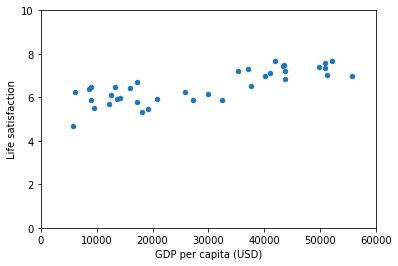

In [9]:
# Visualize Data
country_stats.plot(kind='scatter', x='GDP per capita (USD)', y='Life satisfaction', xlim=(0, 60000), ylim=(0,10))
plt.show()

In [10]:
# Select a Linear Model
model = sklearn.linear_model.LinearRegression()

In [11]:
# Train the Model
model.fit(X, y,)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus GDP per capita
print(model.predict(X_new))

[[6.2910907]]


In [16]:
# let's visualize our model, because it's a linear one, we can plot it using two points
X = [[10000], [50000]]
y_hat = model.predict(X)

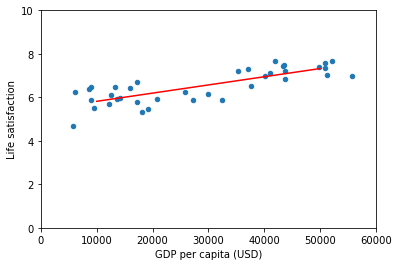

In [17]:
# Visualize Data
country_stats.plot(kind='scatter', x='GDP per capita (USD)', y='Life satisfaction', xlim=(0, 60000), ylim=(0,10))
plt.plot(X, y_hat, c='red')
plt.show()

In summary, we go through the following steps to deploy an ML algorithm:
1. We study the data: Exploratory data analysis (EDA)
2. We select the model
3. We train the model
4. We infer using the model

## Main Challenges of Machine Learning

The two things that can go wrong with a machine learning project are:
- Collecting bad data.
- Picking a bad learning algorithm

### Data

Data quantity can be a big problem. Even for very simple ml algorihtms, it takes thousands of examples for a convolutional neural network to recognize Cat/Dog in images. A famous paper showed that many algorithms, ranging from very simple ones to complex, perform relatively the same when given enough data. The authors argued that companies should reconsider where to invest their money, in algorithms development or in data corpus engineering.

The training sample can also be non-representative of the source dataset. In order to generalize well, It's important that our training data be representative of the data that we want to use in production. If, for example, the training set is too small, we will have sampling noise. Even large samples can be non-representative if the sampling method is flawed, this is called **sampling bias** (Example: non-response bias).

Poor quality data can also be a big challenge. Obviously, if our training data is full of outliers, errors, and noise, it will make it harder for the algorithm to detect the underlying patterns, resulting in a bad model. It's always better to properly clean and investigate the data before doing any modeling. Examples of data cleaning:
- Outlier detection and cleaning by either removing or replacing the outlier values.
- Cleaning missing features by either discarding their instances, filling them with median/average, or training an auxiliary model to predict their values. 

It's almost always the case that datasets contain irrelevant features. Our system will only learn if the data contains many relevant features and not so many irrelevant ones. A critical part of the success of a machine learning project is what's called **feature engineering** or coming up with features that would produce a quality model, it contains two steps:
1. Feature selection: selecting the most useful features to analyze.
2. Feature Extraction: adding new features based of the selected ones.
We can also create new features by gathering new data.

### Overfitting

Overfitting means that the ML system performs well on the training data but fails to generalize. Complex models such as deep neural networks tend to memorize training data noise or even the data sample itself if it is small enough. We can do the following to mitigate overfitting:
- Select a model with fewer weights/parameters to constrain its predictive power so that it can use only the strongest present patterns.
- Gather more training data.
- Reduce the noise in the training data by fixing errors and eliminate outliers.

Constraining a model & fighting overfitting is called **regularization**. If we take the example of a single linear regression model ($f(x)=ax+b$), it has two degrees of freedom ($2$ parameters). If we let the algorithm change one parameter's values freely but have a set interval around parameter 2, it will have between 1 and 2 degree of freedom. We would want a good balance between keeping the model as simple as possible while giving the model the ability to capture out of training data patterns.

Regularization can be controlled using the model's hyperparameters, which describe how the model should learn.

### Underfitting

Underfitting is the opposite of overfitting. It occurs when the model is too simple to capture the underlying structure of the training data. We present the following solutions to the problem:
- We can select a more powerful model, with more parameters
- We feed better features to the learning algorithm (feature engineering)
- We reduce the constraints on the model (reduce regularization)

## Testing & Validating

We can evaluate our model by splitting the data into two sets: **training** and **testing** data sets. We only care about out-of-training error, or generalization error, as it is representative of the model's performance in a production environment.

If our training error is low but the testing error is high, this means that the model is overfitting. It's common to use **80%** of the data for training and the remaining 20% for testing, but it is dependent on the size of the original data set, the bigger it is, the less percent we can take as a testing set.

If we fine-tune regularization parameters on the test set, we are sort of overfitting to it, so we need another data set for hyper-parameter tuning, this data set is usually called the **validation set**. The validation set should be set aside from the training set. After conducting hyper-parameter tuning on using the validation set, we train the model on the full training set (with validation) & evaluate on the test set.

A simple but computationally expensive solution to setting aside a large validation set is to perform repeated cross-validation. Its drawback is that we have to train the model N-repetitions. The validation set & the test set must be as representative as possible of the data we will use in production. 

One Problem is that if the algorithm is performing poorly on the validation set, we won't know if the cause is overfitting or if the training set isn't good for the task at hand. A solution to this is to introduce another validation set, called 'train-dev' set. After training, we will validate the model on both `train-dev` & validation sets. If evaluation is good on `train-dev` & bad on `validation`, this means that the data is not good for the task at hand. If evaluation is bad on `train-dev` & bad on `validation`, this means overfitting or the algorithm/overall data is not good.


We should think of a model as a simplified version of the observations. This simplification is meant to discard noise and capture generalizable useful patterns in the training and testing datasets. To decide what information to discard and what to keep, you must make assumptions. For example, a linear model assumes that the relation between the input & output is fundamentally linear & the distance between the model line and the observations is essentially **noise**.

If we make no assumptions about the data, than there is no need to prefer one model over another. This is the point behind the "no free lunch theorem", which states the following:

> [David Wolpert & William Macready] Any two optimization algorithms are equivalent when their performance is averaged across all possible problems

## Exercices

**1. How would you define Machine Learning?**

Machine Learning is the computer's ability to learn from data without being explicitly programmed.

**2. Can you name four types of problems where it shines?**

Image classification, Voice Recognition, Semantic Segmentation, Sentiment Analysis.

**3. What is a labeled training set?**

In the context of supervised learning, a labeled training set is a data set with available targets. Meaning that what you want to predict is known before training.

Example: a training set composed of images of cats or dogs and the corresponding **label** (cat/dog) for each of the images.

**4. What are the two most common supervised tasks?**

Classification (where the target is categorical in nature) & Regression (where the labels' domain is continuous).

**5. Can you name four common unsupervised tasks?**

Clustering, Anomaly detection, Visualization, dimensionality reduction.

**6. What type of machine learning algorithm would you use to allow a robot to walk in many paths in an unknown terrain?**

Reinforcement learning.

**7. What type of algorithm would you use to segment your customers into multiple groups?**

An unsupervised clustering algorithm like `K-means` or `DBSCAN`.

**8. Would you frame the problem of spam detection as a supervised learning or an unsupervised learning problem?**

It a supervised learning problem.

**9. What is an online learning system?**

An online learning system continues to learn from new data after being deployed in production, in contrast to a batch learning model which would stop learning after the initial training process.

**10. What is out-of-core learning?**

We use out-of-core learning algorithms when the training data can't fit in a computer's RAM.

**11. What type of learning algorithm relies on a similarity measure to make predictions?**

Instance-based models, an example of this is K-nearest neighbors.

**12. What is the difference between a model's parameters and a learning algorithm's hyper-parameter?**

Model parameters are the knobs that, collectively, store the learned knowledge of the model, also called weights, they are continuously changed during training to minimize a cost function. Examples are `a` & `b` in the linear model: $f(x) = ax + b$.

A learning algorithm's hyper-parameter describes how the algorithm should learn and control the predictive power of the model, example is the learning rate, number of layers in a NN, number of parameters, batch size, they are set before training and aren't changed during training.

**13. What do model-based algorithms search for?**

A decision boundary.

**14. What is the most common strategy they use to succeed?**

They minimize a cost function that describe the distance between the predictions outputted by the model and the real target values.

**14. How do they make predictions?**

They start with a set of initial parameters, make predictions based on the input & their parameters, then adjust their parameters to minimize cost.

**15. Can you name 4 of the main challenges in machine learning?**

For algorithmic challenges: Model Overfitting, Model Underfitting. Data challenges include: Data mismatch, Noisy data.

**16. If your model performs great on the training data but fails on the test data, What is happening?**

Overfitting, the model starts memorizing noise present on the training data to further minimize the cost function. 

**17. Can you name 3 possible solutions?**

Regularization, Adding more data, Simplifying the model.

**18. What is a test set? & Why you would want to use it?**

The whole data set is usually split into training and testing data sets, we use test data to evaluate the generalizability of the model beyond the training data set.

**19. What is the purpose of a validation set?**

A validation set is used to fine-tune the models' hyper-parameters, what is called manual training. It leaves the test set for the final evaluation.

**20. What is the `train-dev` set?, When do you use it? & How do you use it?**

the `train-dev` is a validation set that is taken from a broad training set after performing the train/validation/test split. We use it when we have a broad training data set (ex. images of all animals) but specific validation/test set (zoo animal pics taken with mobile phones) and we want to correctly interpret the model's evaluation. 

We train the model on the training data set, we evaluate on `train-dev` and `validation`, if model performs badly on both, we have an overfitting case, if the model performs good in `train-dev` and badly on `validation` we have a data mismatch, we conclude that the learning doesn't generalize to our specific production data.

**21. What can go wrong if you tune hyper-parameters using the test set?**

We can accidentaly overfit to the test set by manually finding hyper-parameters that perform well on the test set but doesn't generalize to production data.

---